Quantidade de vetores sendo ordenados:
100
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000

Número de vetores: 100 
Bubble: 0.0004401206970214844 s 
Insertion: 0.0002384185791015625 s
Selection: 0.00023818016052246094 s 
Merge: 0.00023984909057617188 s 
Shell: 0.00013589859008789062 s

Número de vetores: 1000 
Bubble: 0.04084420204162598 s 
Insertion: 0.02120494842529297 s
Selection: 0.0198516845703125 s 
Merge: 0.0027840137481689453 s 
Shell: 0.0019106864929199219 s

Número de vetores: 2000 
Bubble: 0.1698451042175293 s 
Insertion: 0.07616686820983887 s
Selection: 0.07754230499267578 s 
Merge: 0.005354642868041992 s 
Shell: 0.0043833255767822266 s

Número de vetores: 3000 
Bubble: 0.38384366035461426 s 
Insertion: 0.18008017539978027 s
Selection: 0.1752793788909912 s 
Merge: 0.008373737335205078 s 
Shell: 0.00705265998840332 s

Número de vetores: 4000 
Bubble: 0.6816797256469727 s 
Insertion: 0.3346588611602783 s
Selection: 0.31537413597106934 s 
Merge: 0.011530876159667969 s 
Shel

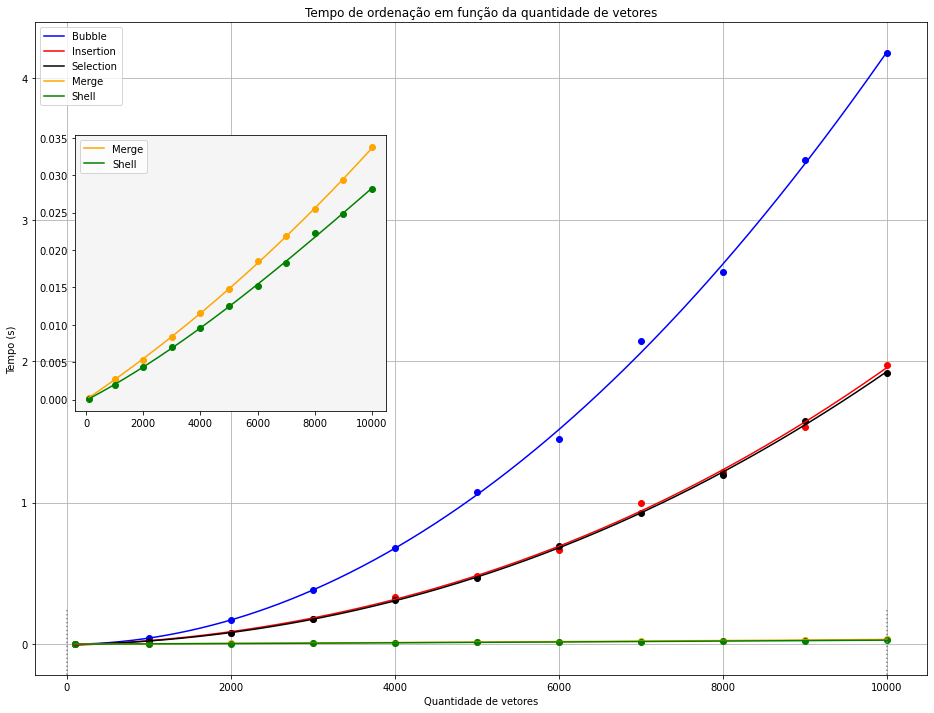

In [3]:
from time import time
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline

######################    BUBBLE    ######################
def bubble_sort(list):
    for iter_num in range(len(list)-1,0,-1):
        for idx in range(iter_num):
            if list[idx]>list[idx+1]:
                temp = list[idx]
                list[idx] = list[idx+1]
                list[idx+1] = temp

######################  INSERTION  ######################
def insertion_sort(InputList):
    for i in range(1, len(InputList)):
        j = i-1
        nxt_element = InputList[i]
        while (InputList[j] > nxt_element) and (j >= 0):
            InputList[j+1] = InputList[j]
            j=j-1
        InputList[j+1] = nxt_element

######################   MERGE    ######################
def merge_sort(unsorted_list):
    if len(unsorted_list) <= 1:
        return unsorted_list
    middle = len(unsorted_list) // 2
    left_list = unsorted_list[:middle]
    right_list = unsorted_list[middle:]
    left_list = merge_sort(left_list)
    right_list = merge_sort(right_list)
    lista = merge(left_list, right_list)
    return lista

def merge(left_half,right_half):
    res = []
    while len(left_half) != 0 and len(right_half) != 0:
        if left_half[0] < right_half[0]:
            res.append(left_half[0])
            left_half.remove(left_half[0])
        else:
            res.append(right_half[0])
            right_half.remove(right_half[0])
    if len(left_half) == 0:
        res = res + right_half
    else:
        res = res + left_half
    return res

######################   SHELL   ######################
def shell_sort(input_list):
    gap = len(input_list) // 2
    while gap > 0:
        for i in range(gap, len(input_list)):
            temp = input_list[i]
            j = i
            while j >= gap and input_list[j - gap] > temp:
                input_list[j] = input_list[j - gap]
                j = j-gap
            input_list[j] = temp
        gap = gap//2

#####################  SELECTION  #####################
def selection_sort(input_list):
    for idx in range(len(input_list)):
        min_idx = idx
        for j in range( idx +1, len(input_list)):
            if input_list[min_idx] > input_list[j]:
                min_idx = j
        input_list[idx], input_list[min_idx] = input_list[min_idx], input_list[idx]


#####################  ORDENAÇÃO  #####################
vetores = []
time_b = []
time_m = []
time_i = []
time_se = []
time_sh = []

print('Quantidade de vetores sendo ordenados:')
t_total = 0
n = 100
n_max = 10000
q_passos = 10

def lista_aleatoria(n,n_max):
    lista0 = []
    np.random.seed(1)
    for i in range(n):
        y = random.randint(0, n_max + 1)
        lista0.append(y)
    return lista0
while n <= n_max:
  print(n)

  t_t0 = time()

  t0 = time()
  bubble_sort(lista_aleatoria(n,n_max))
  t_bubble = time() - t0

  t0 = time()
  insertion_sort(lista_aleatoria(n,n_max))
  t_insertion = time() - t0

  t0 = time()
  selection_sort(lista_aleatoria(n,n_max))
  t_selection = time() - t0

  t0 = time()
  merge_sort(lista_aleatoria(n,n_max))
  t_merge = time() - t0

  t0 = time()
  shell_sort(lista_aleatoria(n,n_max))
  t_shell = time() - t0

  delta_t_t = time() - t_t0
  t_total += delta_t_t

  vetores.append(n)
  time_b.append(t_bubble)
  time_i.append(t_insertion)
  time_se.append(t_selection)
  time_m.append(t_merge)
  time_sh.append(t_shell)

  if n == 100:
    n = 0

  n += int(n_max/q_passos)

vet = int((q_passos)/10)
print_vet = 0
for i in range(len(vetores)-1):
  if i == print_vet:
    print("\nNúmero de vetores:", vetores[i],'\nBubble:', time_b[i],'s','\nInsertion:',time_i[i],'s')
    print('Selection:',time_se[i],'s','\nMerge:',time_m[i],'s','\nShell:',time_sh[i],'s',)
    print_vet += vet

i =  len(vetores)-1
print("\nNúmero de vetores:", vetores[i],'\nBubble:', time_b[i],'s','\nInsertion:',time_i[i],'s')
print('Selection:',time_se[i],'s','\nMerge:',time_m[i],'s','\nShell:',time_sh[i],'s',)

print('\nTempo de todas as ordenações:',t_total,'s')

######################  GRÁFICO  ######################
vetores = np.array(vetores)
time_b = np.array(time_b)
time_i = np.array(time_i)
time_se = np.array(time_se)
time_m = np.array(time_m)
time_sh = np.array(time_sh)

print('\n')
fig, ax = plt.subplots(figsize=(16, 12))
plt.xlabel('Quantidade de vetores')
plt.ylabel('Tempo (s)')
plt.title('Tempo de ordenação em função da quantidade de vetores')
ax.grid()

xs = np.linspace(min(vetores),max(vetores),1000)
spl_b = UnivariateSpline(vetores,time_b)
spl_i = UnivariateSpline(vetores,time_i)
spl_se = UnivariateSpline(vetores,time_se)
spl_m = UnivariateSpline(vetores,time_m)
spl_sh = UnivariateSpline(vetores,time_sh)

plt.plot(vetores,time_b,"o",color='b')
plt.plot(vetores,time_i,"o",color='r')
plt.plot(vetores,time_se,"o",color='black')
plt.plot(vetores,time_m,"o",color='orange')
plt.plot(vetores,time_sh,"o",color='g')

plt.plot(xs,spl_b(xs),"b",label="Bubble")
plt.plot(xs,spl_i(xs),"red",label="Insertion")
plt.plot(xs,spl_se(xs),"black",label="Selection")
plt.plot(xs,spl_m(xs),"orange",label="Merge")
plt.plot(xs,spl_sh(xs),"g",label="Shell")
ax.grid()
plt.legend(loc="best")
ax.grid()

#  DETALHE  #
ax_insert = fig.add_axes([0.16, 0.43, 0.27, 0.32], facecolor='#f5f5f5')
x0, x1 = 10000, 1
ax.axvline(x0, ymax = 0.1, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.1, color="grey", linestyle=":")
xi = np.linspace(x0, x1, 1000)

plt.plot(vetores,time_m,"o",color='orange')
plt.plot(vetores,time_sh,"o",color='g')

plt.plot(xs,spl_m(xs),"orange",label="Merge")
plt.plot(xs,spl_sh(xs),"g",label="Shell")
plt.legend(loc="best")


Quantidade de vetores sendo ordenados:
10000
200000
400000
600000
800000
1000000

Número de vetores: 10000
Merge: 0.05227351188659668 s 
Shell: 0.03235006332397461 s

Número de vetores: 200000
Merge: 3.1328320503234863 s 
Shell: 1.1107027530670166 s

Número de vetores: 400000
Merge: 11.042633056640625 s 
Shell: 2.578446388244629 s

Número de vetores: 600000
Merge: 24.279353380203247 s 
Shell: 4.1274144649505615 s

Número de vetores: 800000
Merge: 42.46733856201172 s 
Shell: 6.354367017745972 s

Número de vetores: 1000000
Merge: 65.88241028785706 s 
Shell: 8.170181035995483 s

Tempo de todas as ordenações: 169.23033046722412 s




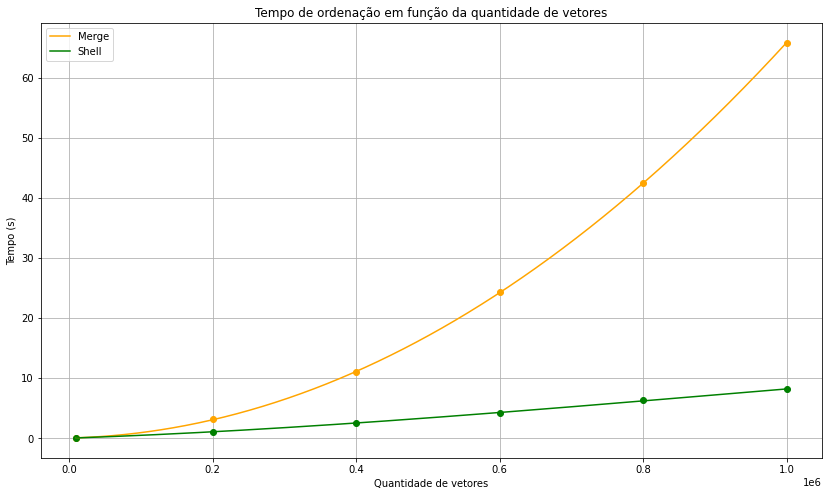

In [4]:
from time import time
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline

######################  ORDENAÇÃO MERGE E SHELL  ######################
vetores = []
time_m = [] 
time_sh = []

print('Quantidade de vetores sendo ordenados:')
t_total = 0
n = 10000
n_max = 1000000
q_passos = 5

def lista_aleatoria(n,n_max):
    lista0 = []
    np.random.seed(1)
    for i in range(n):
        y = random.randint(0, n_max + 1)
        lista0.append(y)
    return lista0

while n <= n_max:
  print(n)
  t_t0 = time()

  t0 = time()
  merge_sort(lista_aleatoria(n,n_max))
  t_merge = time() - t0

  t0 = time()
  shell_sort(lista_aleatoria(n,n_max))
  t_shell = time() - t0


  delta_t_t = time() - t_t0
  t_total += delta_t_t

  vetores.append(n)
  time_m.append(t_merge)
  time_sh.append(t_shell)

  if n == 10000:
    n = 0

  n += int(n_max/q_passos)

vet = int((q_passos)/5)
print_vet = 0
for i in range(len(vetores)-1):
  if i == print_vet:
    print("\nNúmero de vetores:", vetores[i])
    print('Merge:',time_m[i],'s','\nShell:',time_sh[i],'s',)
    print_vet += vet

i =  len(vetores)-1
print("\nNúmero de vetores:", vetores[i])
print('Merge:',time_m[i],'s','\nShell:',time_sh[i],'s',)

print('\nTempo de todas as ordenações:',t_total,'s')

######################     GRÁFICO     ######################
vetores = np.array(vetores)
time_m = np.array(time_m)
time_sh = np.array(time_sh)

print('\n')
fig, ax = plt.subplots(figsize=(14, 8))
plt.xlabel('Quantidade de vetores')
plt.ylabel('Tempo (s)')
plt.title('Tempo de ordenação em função da quantidade de vetores')
ax.grid()

xs = np.linspace(min(vetores),max(vetores),1000)
spl_m = UnivariateSpline(vetores,time_m)
spl_sh = UnivariateSpline(vetores,time_sh)

plt.plot(vetores,time_m,"o",color='orange')
plt.plot(vetores,time_sh,"o",color='g')

plt.plot(xs,spl_m(xs),"orange",label="Merge")
plt.plot(xs,spl_sh(xs),"g",label="Shell")
plt.legend(loc="best")